# imports

In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# load all params

In [2]:
# simulate dannce-train run using alias
from dannce.cli import dannce_train_cli

/opt/conda/envs/dannce_pytorch/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# load all params 
params = dannce_train_cli(debug=True)

io_config not found in io.yaml file, falling back to main config
random_seed not found in io.yaml file, falling back to main config
dataset not found in io.yaml file, falling back to main config
camnames not found in io.yaml file, falling back to main config
n_views not found in io.yaml file, falling back to main config
num_validation_per_exp not found in io.yaml file, falling back to main config
data_split_seed not found in io.yaml file, falling back to main config
vmin not found in io.yaml file, falling back to main config
vmax not found in io.yaml file, falling back to main config
nvox not found in io.yaml file, falling back to main config
interp not found in io.yaml file, falling back to main config
expval not found in io.yaml file, falling back to main config
medfilt_window not found in io.yaml file, falling back to main config
rand_view_replace not found in io.yaml file, falling back to main config
n_rand_views not found in io.yaml file, falling back to main config
mirror_augment

# setup dataloader

In [4]:
from dannce.interface import dannce_train

In [5]:
train_loader, val_loader = dannce_train(params=params, debug=True)

***Use [0] GPU for training.***
***Fix random seed as 1024***


** Loading in SLAP2M annotation **


100%|██████████| 10/10 [00:00<00:00, 439.29it/s]
Initializing Network...
*** Finetuning from /home/jovyan/vast/ckapoor/keypoint-tracking/dannce-pytorch-custom/demo/single-mouse-markerless/DANNCE/train_lr_1e-2_batch_4_non-aligned_vlim150/checkpoint-epoch100.pth. ***


None
Init took 0.0019893646240234375 sec.
None
Init took 0.0008423328399658203 sec.
type train: <class 'dannce.engine.data.generator.DataGenerator_3Dconv'>


DANNCE(
  (encoder_decoder): EncoderDecorder_DANNCE(
    (encoder_res1): Basic3DBlock(
      (block): Sequential(
        (0): Conv3d(24, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (1): LayerNormalization(normal_shape=torch.Size([64, 80, 80, 80]), gamma=True, beta=True, epsilon=0.001)
        (2): ReLU(inplace=True)
        (3): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (4): LayerNormalization(normal_shape=torch.Size([64, 80, 80, 80]), gamma=True, beta=True, epsilon=0.001)
        (5): ReLU(inplace=True)
      )
    )
    (encoder_pool1): Pool3DBlock()
    (encoder_res2): Basic3DBlock(
      (block): Sequential(
        (0): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (1): LayerNormalization(normal_shape=torch.Size([128, 40, 40, 40]), gamma=True, beta=True, epsilon=0.001)
        (2): ReLU(inplace=True)
        (3): Conv3d(128, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padd

In [7]:
data_item = next(iter(train_loader))

In [9]:
x, x_grid, y_3d, aux = data_item

In [11]:
y_3d = y_3d.transpose(-1, 1)[0]

In [12]:
print(f'x: {x.shape}\n x_grid: {x_grid.shape}\n y3d: {y_3d.shape}\n aux: {aux}')

x: torch.Size([1, 24, 80, 80, 80])
 x_grid: torch.Size([1, 512000, 3])
 y3d: torch.Size([15, 3])
 aux: None


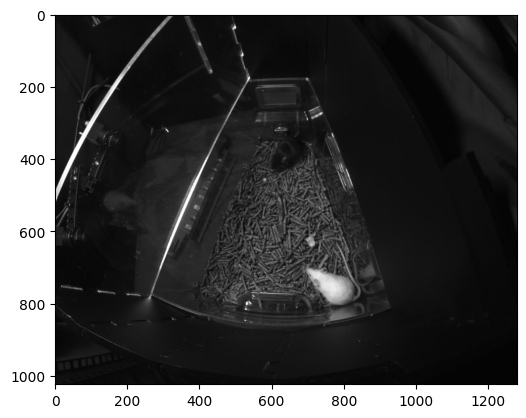

In [15]:
# path is from dloader
img = cv.imread('/home/jovyan/vast/ckapoor/multi-animal-dannce/slap_2m_sample/frames/10072022131531_13781_backL.jpg')
plt.imshow(img)

## verify cropping vol + 3d points

In [19]:
x_grid = x_grid[0]

In [6]:
def find_cube_corners(grid: np.ndarray):
    x = grid[:, 0]
    y = grid[:, 1]
    z = grid[:, 2]
    
    corners = np.array([
    [x.min(), y.min(), z.min()],
    [x.min(), y.min(), z.max()],
    [x.min(), y.max(), z.min()],
    [x.min(), y.max(), z.max()],
    [x.max(), y.min(), z.min()],
    [x.max(), y.min(), z.max()],
    [x.max(), y.max(), z.min()],
    [x.max(), y.max(), z.max()]])
    
    return corners

In [22]:
corners = find_cube_corners(grid=x_grid)

In [23]:
corners.shape

(8, 3)

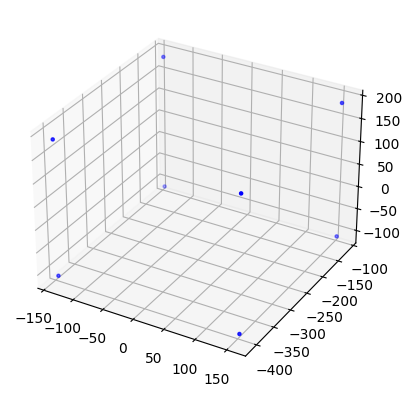

In [24]:
# plot cube corners
x_corners, y_corners, z_corners = corners[:, 0], corners[:, 1], corners[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_corners, y_corners, z_corners, c='b', marker='.')
plt.show()

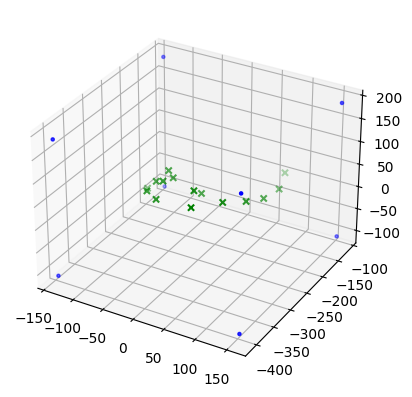

In [35]:
# plot cube corners + 3d points
x3d, y3d, z3d = y_3d[:, 0], y_3d[:, 1], y_3d[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_corners, y_corners, z_corners, c='b', marker='.')
ax.scatter(x3d, y3d, z3d, c='g', marker='x')
plt.show()

# 3d labels and grid

In [7]:
X, y, pj_grid, im, xgrid = train_loader.__getitem__(0)

/opt/conda/envs/dannce_pytorch/lib/python3.7/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


shape: torch.Size([512000, 2])
shape: torch.Size([512000, 2])
shape: torch.Size([512000, 2])
shape: torch.Size([512000, 2])shape: torch.Size([512000, 2])

shape: torch.Size([512000, 2])
shape: torch.Size([512000, 2])
shape: torch.Size([512000, 2])


In [8]:
xgrid = xgrid.detach().cpu().numpy()
y = y[0]
y = y.transpose(0, -1, 1)[0]

In [8]:
xgrid.shape

(512000, 3)

Loaded backend module://matplotlib_inline.backend_inline version unknown.


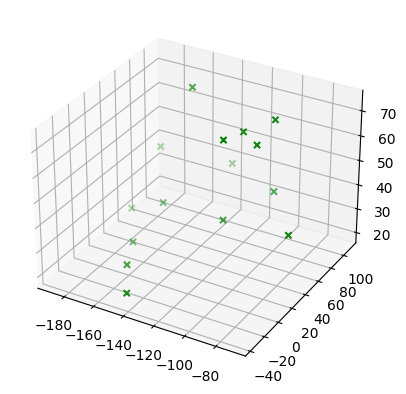

In [32]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(xgrid[...,0], xgrid[...,1], xgrid[...,1], c='b', marker='.')
ax.scatter(y[...,0], y[...,1], y[...,2], c='g', marker='x')
plt.show()

In [9]:
session_idx = '0_13781_10072022131531'

In [19]:
threeD_labels = train_loader.labels_3d[session_idx].transpose(1, 0)
com3d = train_loader.com3d[session_idx]

In [51]:
# extract cube corners 
corners = find_cube_corners(grid=xgrid)

Loaded backend module://matplotlib_inline.backend_inline version unknown.


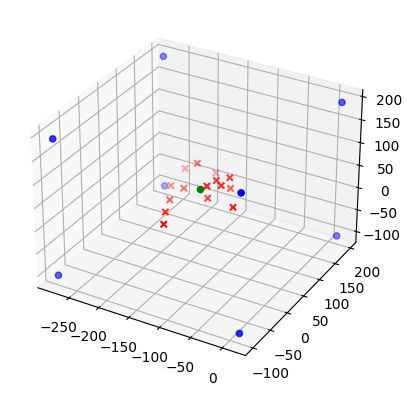

In [52]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(threeD_labels[...,0], threeD_labels[...,1], threeD_labels[...,2], c='r', marker='x')
ax.scatter(corners[...,0], corners[...,1], corners[...,2], c='b', marker='o')
ax.scatter(com3d[0], com3d[1], com3d[2], c='g', marker='o')
plt.show()

## test reprojections

In [10]:
# get camera params
camera_params = train_loader.camera_params[0]

In [11]:
pj_grid = pj_grid.detach().cpu().numpy()

In [12]:
from dannce.engine.data.ops import project_to2d

In [17]:
import torch

In [39]:
camera_params.keys()

dict_keys(['0_back', '0_backL', '0_mid', '0_midL', '0_side', '0_sideL', '0_top', '0_topL'])

In [42]:
camname = '0_midL'

R = camera_params[camname]["R"]
t = camera_params[camname]["t"]
K = camera_params[camname]["K"]
Rdistort = camera_params[camname]["RDistort"]
Tdistort = camera_params[camname]["TDistort"]

dist_vec = np.concatenate((Rdistort, Tdistort))

In [46]:
proj_kpts = project_to2d(pts=torch.tensor(threeD_labels), rvec=R, tvec=t, K=K, distortion_vec=dist_vec).squeeze(1)
proj_kpts = proj_kpts.detach().cpu().numpy()

pgrid = project_to2d(pts=torch.tensor(xgrid), rvec=R, tvec=t, K=K, distortion_vec=dist_vec).squeeze(1)
pgrid = pgrid.detach().cpu().numpy()

com2d = project_to2d(pts=torch.tensor(com3d), rvec=R, tvec=t, K=K, distortion_vec=dist_vec).squeeze(1)
com2d = com2d.detach().cpu().numpy()

In [56]:
corners = np.array([[pj_grid[...,0].min(), pj_grid[...,1].min()],
                    [pj_grid[...,0].min(), pj_grid[...,1].max()], 
                    [pj_grid[...,0].max(), pj_grid[...,1].min()], 
                    [pj_grid[...,0].max(), pj_grid[...,1].max()]])

Loaded backend module://matplotlib_inline.backend_inline version unknown.


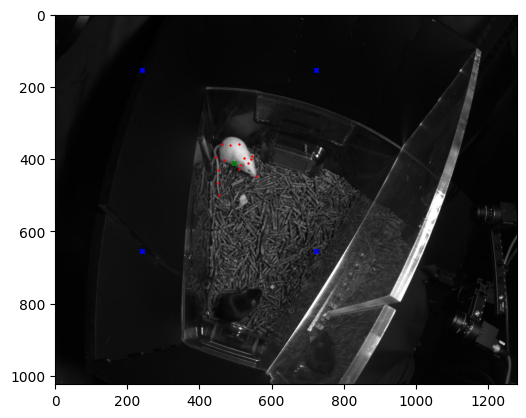

In [63]:
%matplotlib inline
plt.figure()
plt.imshow(im)
#plt.scatter(pj_grid[...,0], pj_grid[...,1], c='g', marker='o', s=0.5)
#plt.scatter(pgrid[...,0], pgrid[...,1], c='b', marker='o', s=0.5)
plt.scatter(corners[...,0], corners[...,1], c='b', marker='x', s=10.)
plt.scatter(com2d[...,0], com2d[...,1], c='g', marker='x', s=10.)
plt.scatter(proj_kpts[...,0], proj_kpts[...,1], c='r', marker='o', s=0.5)
plt.show()

Loaded backend module://matplotlib_inline.backend_inline version unknown.


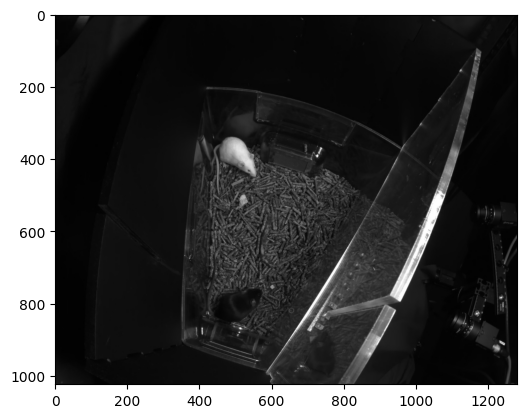

In [41]:
a = cv.imread('/home/jovyan/vast/ckapoor/multi-animal-dannce/slap_2m_sample/frames/10072022131531_13781_midL.jpg')
%matplotlib inline
plt.imshow(a)
#plt.scatter(pj_grid[...,0], pj_grid[...,1], c='g', marker='o', s=0.5)
plt.show()